In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv("Post45_NEAData_Final.csv")
df.head()

,nea_person_id,full_name_lastfirst,full_name_firstlast,given_name_middle,family_name,nea_grant_year,other_nea_grant,country,us_state,hometown,...,gender,race_ethnicity,ba,ba2,ma,ma2,phd,mfa,mfa2,post45_hathi_entry
0,19,"Adams, Leonie",Leonie Adams,Leonie,Adams,1966,NaN,USA,NY,New York,...,female,uniden,Barnard College,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,177,"Belitt, Ben",Ben Belitt,Ben,Belitt,1966,NaN,USA,VT,Bennington,...,male,uniden,University of Virginia,NaN,University of Virginia,NaN,NaN,NaN,NaN,NaN
2,235,"Bird, Laurel",Laurel Bird,Laurel,Bird,1966,NaN,USA,TN,Knoxville,...,female,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,282,"Bourjaily, Vance",Vance Bourjaily,Vance,Bourjaily,1966,1979,USA,IA,Iowa City,...,male,uniden,Bowdoin College,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,303,"Brasfield, Samuel",Samuel Brasfield,Samuel,Brasfield,1966,NaN,USA,AL,Demopolis,...,male,uniden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# how many don't have a race or ethnicity
print("No race", len(df[df.race_ethnicity == "uniden"]))
print("Race", len(df[df.race_ethnicity != "uniden"]))
print(df.race_ethnicity.value_counts())

# how many don't have gender listed?
print("No gender", len(df[df.gender == "unknown"]))

No race 2617
Race 1088
race_ethnicity
uniden                         2617
afam                            220
white                           195
uniden / jewish                 136
asianam                         118
                               ... 
uniden / romanianam               1
caribam / latinx                  1
indigenous / latinx / white       1
latinx / portugueseam             1
uniden / ukranianam               1
Name: count, Length: 94, dtype: int64
No gender 11


In [8]:
#replace uniden + another value with just that other value
df.race_ethnicity = df.race_ethnicity.replace("uniden / ","", regex = True)
r_e = df.race_ethnicity.value_counts()
r_e

race_ethnicity
uniden                         2617
afam                            220
white                           195
jewish                          136
asianam                         118
                               ... 
romanianam                        1
caribam / latinx                  1
indigenous / latinx / white       1
latinx / portugueseam             1
ukranianam                        1
Name: count, Length: 94, dtype: int64

<Axes: title={'center': 'Race of NEA Creative Writing Recipients'}, xlabel='race_ethnicity'>

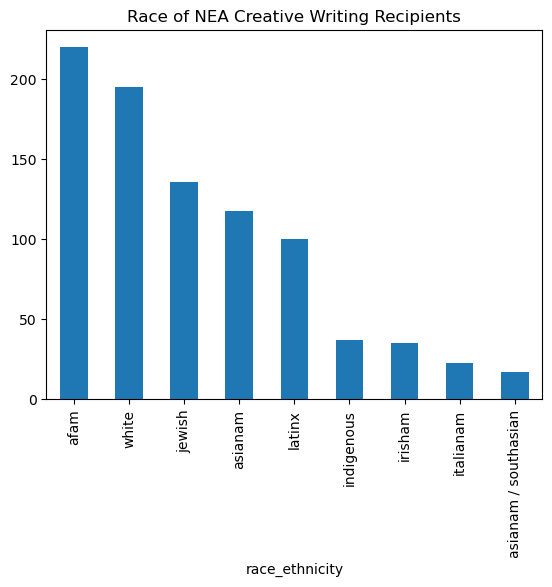

In [10]:
#quick plot of top 10 race/ethnicities
race = r_e[1:10]
race.plot.bar(title = "Race of NEA Creative Writing Recipients")

In [12]:
ba = df.ba.value_counts()[:11]
ba

ba
Harvard University                   106
Columbia University                   68
Yale University                       64
University of California Berkeley     59
University of Michigan Ann Arbor      50
Brown University                      42
San Francisco State University        40
Oberlin College                       37
New York University                   36
University of Iowa                    35
University of Washington              33
Name: count, dtype: int64

ba listed  2973
ba listed  80.24291497975709 %


<Axes: xlabel='ba'>

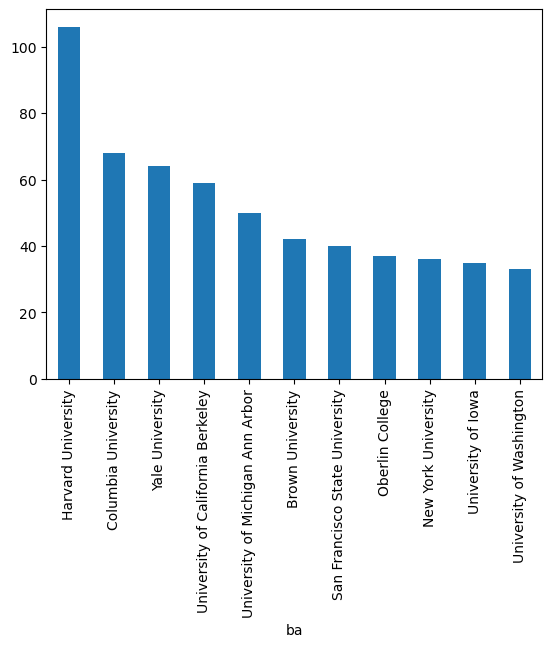

In [16]:
#quick plot of ba distribution
print("ba listed ",len(df) - df.ba.isna().sum())
print("ba listed ", ((len(df) - df.ba.isna().sum())/len(df))*100,"%")
ba.plot.bar()

In [18]:
ivies = ["Brown University", "Columbia University", "Cornell University", "Dartmouth College", 
"Harvard University", "University of Pennsylvania", "Princeton University", "Yale University"]

df["Ivy"] = df.ba.isin(ivies)
df.Ivy.value_counts()

Ivy
False    3327
True      378
Name: count, dtype: int64

In [20]:
ivies = ["Brown University", "Columbia University", "Cornell University", "Dartmouth College", 
"Harvard University", "University of Pennsylvania", "Princeton University", "Yale University"]
tier_1_schools = [
    "Stanford University",
    "Massachusetts Institute of Technology (MIT)",
    "California Institute of Technology (Caltech)",
    "University of Chicago",
    "Duke University",
    "Northwestern University",
    "University of California, Berkeley (UC Berkeley)",
    "University of California, Los Angeles (UCLA)",
    "University of Michigan, Ann Arbor",
    "University of Texas at Austin",
    "Carnegie Mellon University",
    "University of Southern California (USC)",
    "Johns Hopkins University",
    "Georgia Institute of Technology (Georgia Tech)",
    "University of North Carolina at Chapel Hill"
]

tier_2_schools = [
    "University of Washington",
    "University of Wisconsin-Madison",
    "University of Illinois Urbana-Champaign",
    "University of Florida",
    "Pennsylvania State University (Penn State)",
    "Ohio State University",
    "Purdue University",
    "University of Maryland, College Park",
    "Texas A&M University",
    "University of Minnesota, Twin Cities",
    "University of Virginia",
    "University of California, San Diego (UCSD)",
    "University of California, Davis (UC Davis)",
    "Boston University",
    "University of Rochester",
    "Michigan State University",
    "Indiana University Bloomington",
    "University of Colorado Boulder",
    "University of Arizona",
    "University of Utah"
]

top_schools = ivies + tier_1_schools

# Define a function to fill the new column based on string matching
def fill_new_column(row):
    if row['ba'] in ivies:
        return "Ivy League"
    elif row['ba'] in tier_1_schools:
        return "Tier 1"
    elif row['ba'] in tier_2_schools:
        return "Tier 2"
    else:
        return "not_found"

# Apply the function to create a new column
df['Tier'] = df.apply(fill_new_column, axis=1)

df.Tier.value_counts()

Tier
not_found     3059
Ivy League     378
Tier 2         164
Tier 1         104
Name: count, dtype: int64

In [22]:
top_schools = ivies + tier_1_schools

# Define a function to fill the new column based on string matching
def fill_new_column_top(row):
    if row['ba'] in top_schools:
        return "Top School"
    else:
        return "Other"
        
# Apply the function to create a new column
df['Top_schools'] = df.apply(fill_new_column_top, axis=1)

top_schools = df.Top_schools.value_counts(normalize=True)
top_schools

Top_schools
Other         0.869906
Top School    0.130094
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

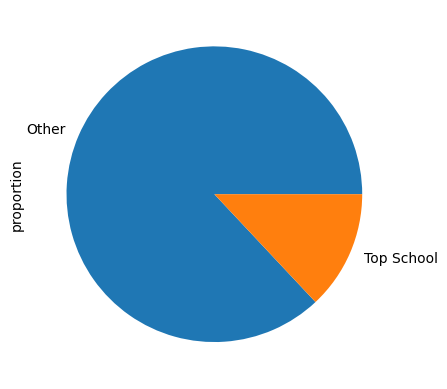

In [24]:
top_schools.plot.pie()